## Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import seaborn as sns
import random
import torch

## Dataset Creation

In [15]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=7.1, coef=True)
print X.shape, y.shape, cof

(500, 1) (500,) 9.863292457234852


## Plotting Data Points

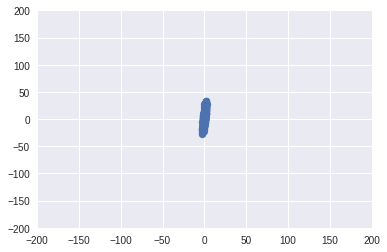

In [16]:
plt.xlim(-200, 200)
plt.ylim(-200, 200)
sns.plt.scatter(X[:, 0], y)

## Data Preprocessing

In [17]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(400, 1) (100, 1)
(400,) (100,)


In [18]:
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
print y_train.shape, y_test.shape

(400, 1) (100, 1)


## Defining parameters(GA)

In [19]:
# Define some initial params
# Dimensionality
Dn = 2                      # No. of Parameters in each NN

# Mutation probability
M = 0.1

# Population size
NP = 500

# No. of generations
G = 20                    # Number of Epochs

In [20]:
def hypothesis(w, x=X_train):
    return x*w[0] + w[1]

## LOSS FUNCTION 

In [21]:
r = y_train
def f(w):
    y = hypothesis(w)
    y = np.reshape(y,(-1,1))
    #print y.shape
    #print r.shape
    return ((r - y)**2).mean()

print r.shape

(400, 1)


In [22]:
# Generate population
# pop = np.zeros((NP, Dn))
pop = []
               
for ix in range(NP):
    # generate a random vector
    vec = np.random.uniform(-100, 100, (Dn,))
    #print vec
    # Add to population
    # pop[ix] = vec
    pop.append(vec)

print len(pop)

500


In [23]:
f(pop[0])

8657.627824894798

In [24]:
def crossover(parent_1, parent_2):
    child_1 = np.zeros(parent_1.shape)
    child_2 = np.zeros(parent_2.shape)
    
    dim = int(parent_1.shape[0] / 2.0)
    
    child_1[:dim] = parent_1[:dim]
    child_1[dim:] = parent_2[dim:]
    
    child_2[:dim] = parent_2[:dim]
    child_2[dim:] = parent_1[dim:]
    
    return child_1, child_2

def mutate(x):
    for ix in range(x.shape[0]):
        # Generate a random number for probability
        R = np.random.random()
        
        if R < M:
            # Mutate random index 
            x[ix] = np.random.uniform(-100, 100)
        else:
            pass
    return x

In [25]:
loss = []

# Main Genetic Algo loop
for gx in range(G):
    pop = sorted(pop, key=lambda z: f(z))
    if True:#gx%10 == 0:
        print "Generation: {} | Best Value: {}".format(gx, f(pop[0]))
    loss.append(f(pop[0]))
    
    # create a temp population
    temp = []
    
    while not len(temp) == NP:
        # Select 2 parents from good section of population
        p1, p2 = random.sample(pop[:int(NP/2.0)], 2)
        #print p1
        #print p2
        # Apply crossover
        c1, c2 = crossover(p1, p2)
        
        # mutate
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        temp.append(c1)
        temp.append(c2)
    
    # create a combined population
    comb = temp + pop
    
    # survival of the fittest
    pop = sorted(comb, key=lambda z: f(z))[:NP]

Generation: 0 | Best Value: 53.7159995853
Generation: 1 | Best Value: 50.1536446513
Generation: 2 | Best Value: 46.6490486916
Generation: 3 | Best Value: 46.6490486916
Generation: 4 | Best Value: 45.2270747222
Generation: 5 | Best Value: 45.2270747222
Generation: 6 | Best Value: 45.2079388221
Generation: 7 | Best Value: 45.2079388221
Generation: 8 | Best Value: 45.2079388221
Generation: 9 | Best Value: 45.2079388221
Generation: 10 | Best Value: 45.2079388221
Generation: 11 | Best Value: 45.2075747959
Generation: 12 | Best Value: 45.2075747959
Generation: 13 | Best Value: 45.2075747959
Generation: 14 | Best Value: 45.2075747959
Generation: 15 | Best Value: 45.2075747959
Generation: 16 | Best Value: 45.2075747959
Generation: 17 | Best Value: 45.2075747959
Generation: 18 | Best Value: 45.2075747959
Generation: 19 | Best Value: 45.2075747959


In [26]:
pop[0]

array([9.71139812, 4.1041624 ])

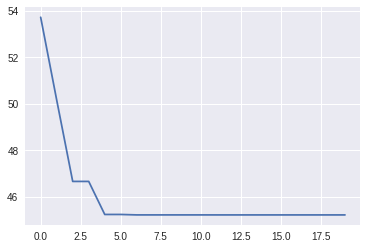

In [27]:
sns.plt.plot(loss)

In [28]:
print pop[0:5] #,'\n', r

[array([9.71139812, 4.1041624 ]), array([9.71139812, 4.1041624 ]), array([9.71139812, 4.1041624 ]), array([9.71139812, 4.1041624 ]), array([9.71139812, 4.1041624 ])]


In [24]:
#import torchvision.models as  mld
#mld.alexnet(pretrained=True)